# Convert a Xarray data array to a geoDataFrame of Points
In this notebook a single time step from a data array is converted into point geometry geoDataFrame. The point geometry can then be used for further spatial analysis.

The process is
* Convert the data array to a Pandas DataFrame.
* Convert the DataFrame to a geoDataFrame.

In [42]:
s = 'Convert a Xarray data array to a geoDataFrame of Points'
s.replace(' ', '_')

'Convert_a_Xarray_data_array_to_a_geoDataFrame_of_Points'

## Setup

In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd

## Read and Prepare the Pixel Data
The following steps create a whole time series pixel-based NDVI summary data array, which is then ready for conversion to point geometry. 

In [12]:
# Read the dataset
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')

In [11]:
# Create the NDVI variable
ds['NDVI'] = (ds.nbart_nir_1 - ds.nbart_red)/(ds.nbart_nir_1 + ds.nbart_red)

In [7]:
# Find the median NDVI per pixel for the whole time series.
NDVI_median = ds.NDVI.median(dim='time')

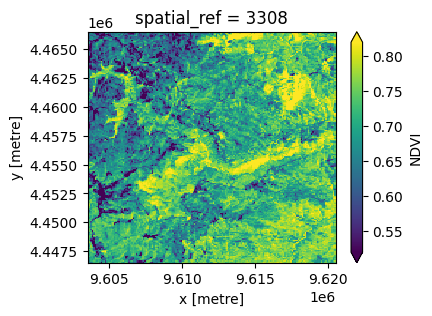

In [13]:
# Plot to check the data
NDVI_median.plot(robust=True, size=3)

## Convert the Data Array to Point Geometry

In [32]:
# Convert to data frame
df = NDVI_median.to_dataframe().reset_index()
df.head()

,y,x,spatial_ref,NDVI
0,4466450.0,9603550.0,3308,0.538381
1,4466450.0,9603650.0,3308,0.616959
2,4466450.0,9603750.0,3308,0.643936
3,4466450.0,9603850.0,3308,0.629527
4,4466450.0,9603950.0,3308,0.510522


There is a `spatial_ref` column which can be dropped. Also, the data frame would be more human-readable if the columns were reordered.

In [33]:
df = df.drop('spatial_ref', axis=1)
df = df[['NDVI','x','y']]
df.head()

,NDVI,x,y
0,0.538381,9603550.0,4466450.0
1,0.616959,9603650.0,4466450.0
2,0.643936,9603750.0,4466450.0
3,0.629527,9603850.0,4466450.0
4,0.510522,9603950.0,4466450.0


Next, perform the conversion to a geoDataFrame. It's important to give the geoDataFrame the same CRS as the pixel data.

In [39]:
gdf = gpd.GeoDataFrame(df.drop(['x','y'], axis=1), 
                       geometry=gpd.points_from_xy(df['x'], df['y']), crs=3308)
gdf.head()

,NDVI,geometry
0,0.538381,POINT (9603550.000 4466450.000)
1,0.616959,POINT (9603650.000 4466450.000)
2,0.643936,POINT (9603750.000 4466450.000)
3,0.629527,POINT (9603850.000 4466450.000)
4,0.510522,POINT (9603950.000 4466450.000)


Perform a plot of a random selection of points to check the data.

<Axes: >

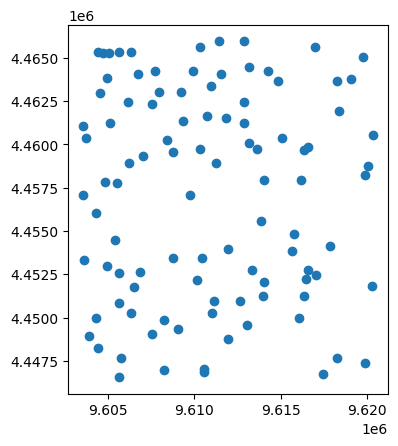

In [41]:
gdf.sample(n=100, random_state=1).plot()